# Student Details
#### Name: Nirmal Rawal
#### Student ID: 2358113
#### Level: 5
#### Group: L5CG6
#### Module Leader: Mr. Siman Giri
#### Assistant Module Leader : Mr.Nabin Aacharya

**Regression Portfolio Task: Regression and Classification.**


This assignment has two parts:
1. Part-I: Multiple Linear Regression.
(a) In this part you will build a Multiple Linear Regression [From Scratch] on your selected dataset.
2. Part-II: Classification with Logistic Regression.
(a) In this part you will implement Logistic Regression [From Scratch] to build a Classifier on your
selected dataset.

Implementation:

Start with Necessary Imports:

In [1]:
# Necessary library imports:
import numpy as np # numpy for mathematical calculations
import pandas as pd #pandas for dataset observation
import matplotlib.pyplot as plt # matplotlib.pyplot for data visualization
import seaborn as sns #seaborn for data visualization
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10.0, 10.0)

Drive Mount:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1= "/content/drive/MyDrive/DataSet/PowerPlant.csv"

***6 Tasks and Marks Division***

**Part-I: Multiple Linear Regression[17.5]:**

*1. Data Understanding, Cleaning and Transformation[2]:*

Understand what is data about and why do you think the data was collected, and what research questions
data can answers.

(a) You can explain your logic in the text cell of your notebook.

Ans:
The collected information appears to be a compilation of observations of several variables relating to a combined cycle power plant with an energy output. Exhaust vacuum, relative humidity, ambient pressure, ambient temperature, and energy output are among the considerations (PE). The information appears to have been gathered to address queries about the operation and effectiveness of the power plant.

With this information,
1.  One can undertake statistical analysis to find the link between the energy production and the ambient temperature.
2. What impact do the relative humidity and ambient pressure have on the energy output?
3. How do these factors impact the power plant's functionality and effectiveness?

In addition, modeling and predictive analysis can be performed on the data, as in:

1. To forecast the power plant's energy production using the ambient temperature, ambient pressure, exhaust vacuum, and relative humidity.

2. To determine the ideal operating circumstances that provide the maximum energy.

In conclusion, it is probable that the data was gathered to enhance our knowledge of the connections between different environmental factors and the energy production of a combined cycle power plant and to utilize this knowledge to enhance the performance and efficiency of the plant.

***(b) Based on your research questions Identify Dependent and Independent Variables.***

Dependent variable: PE

Independent variables:  AT, V, AP and RH

a***(c) Use pandas to load your dataset and observe the data.
If required perform basic data cleaning and Transformation the way you fits your task requirements*.**

In [4]:
df = pd.read_csv(path1) # Loading/Reading the dataset path1
df #printing the dataset

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [5]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
df.tail()

,AT,V,AP,RH,PE
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [10]:
df.shape

(9568, 5)

In [11]:
# using for loop within the columns of df
for c in df:
# checking for the actual columns
  if c in ["AT", "V", "AP", "RH", "PE"]:
# printing the value of count, sum, mean, median, etc of each column
    print(c)
    print(df[c].describe())

AT
count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64
V
count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: V, dtype: float64
AP
count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: AP, dtype: float64
RH
count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: RH, dtype: float64
PE
count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64


In [12]:
# Store in the varaible name X: for independent and Y for dependent.
x = df.iloc[:, [0, 1, 2, 3]].to_numpy() # changing independent variables into numpy arrays
y = df.iloc[:, 4].to_numpy() # changing dependent variable into numpy arrays
print("Mean of dependent: ", np.mean(x, axis=0)) # printing the mean of all 4 colums of independent variables
print("Mean of independent: ", np.mean(y)) # printing the mean of dependent variable

Mean of dependent:  [  19.65123119   54.30580372 1013.25907818   73.30897784]
Mean of independent:  454.36500940635455


**Data Cleaning**

In order to check whether data cleaning is necessary or not, we need to check if there is any null value in the dataset, there is any duplicate value in the dataset and if the outliers are good enough to continue.

In [13]:
df.isnull().sum() #checking whether any value is null using isnull() and finding the count of the null values

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9563    False
9564    False
9565    False
9566    False
9567    False
Length: 9568, dtype: bool

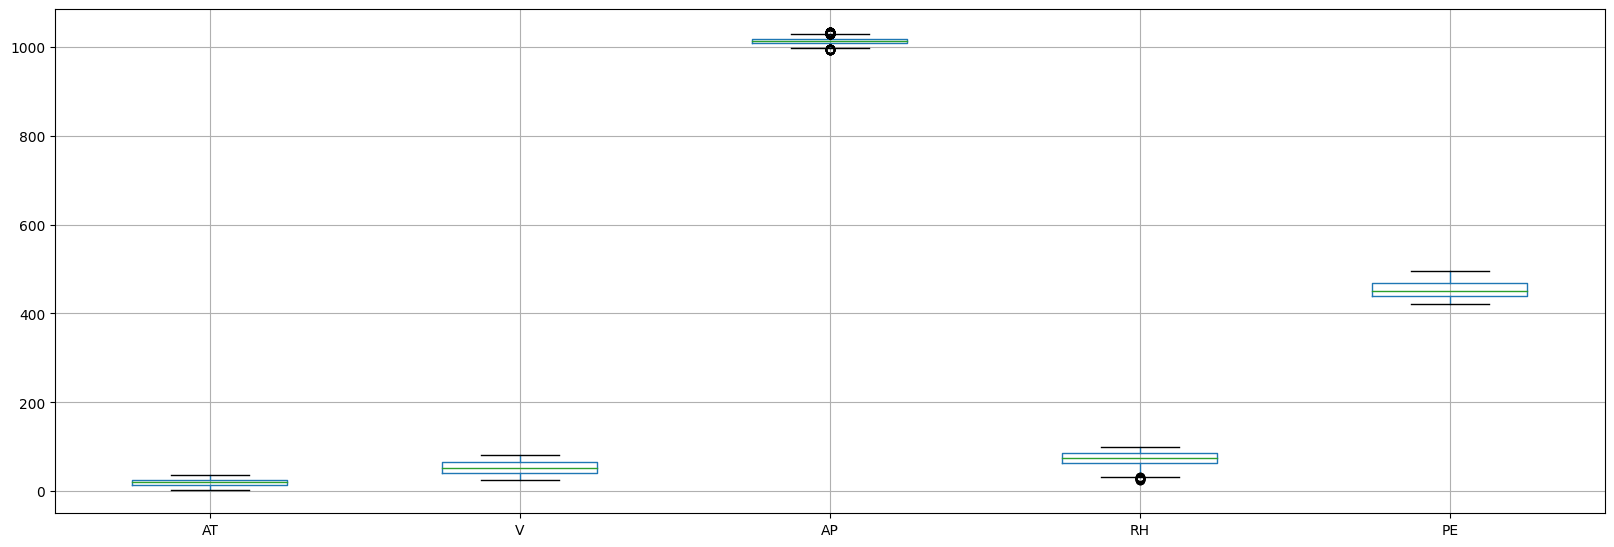

In [15]:
#checking for outliers
df.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Data cleaning is not required because the dataset has fewer outliers, no repititive values and no null values.

**2. Data Analysis and Visualization[2.5]:**

Find the descriptive statistics of your data using pandas and use matplotlib or any other library to make
various plots to generate insights from dataset.
To generate better insights from the data make visualization and plot of your Independent variable against
Dependent variable.

<ipython-input-17-60cabf4f744b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

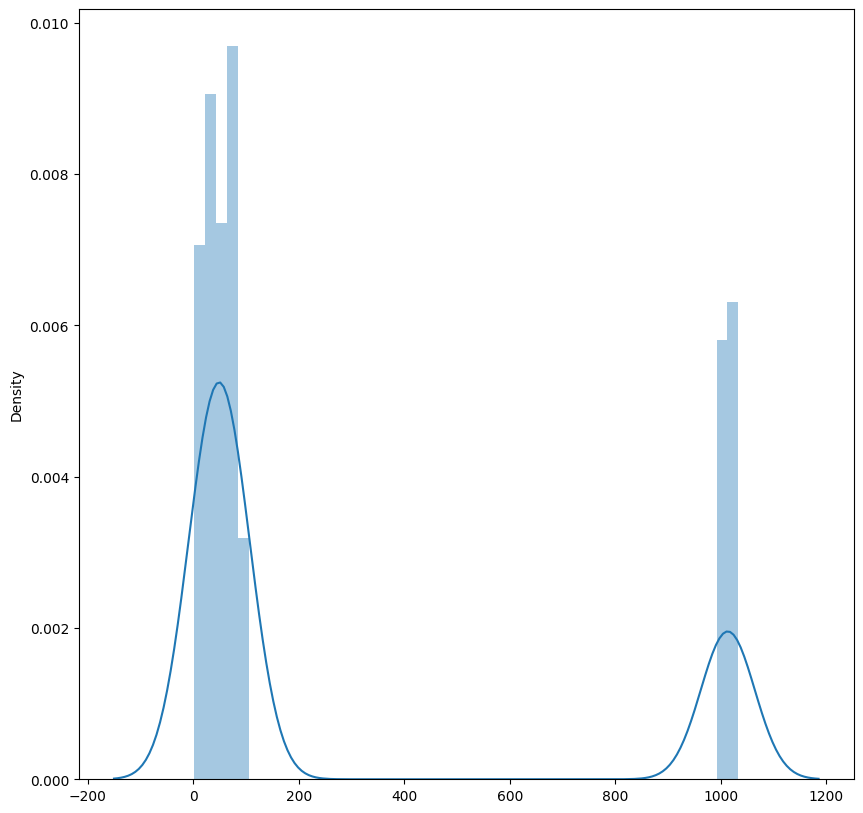

In [17]:
#Visualizing Independent Data
sns.distplot(x)


<ipython-input-19-658e97fc5093>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: ylabel='Density'>

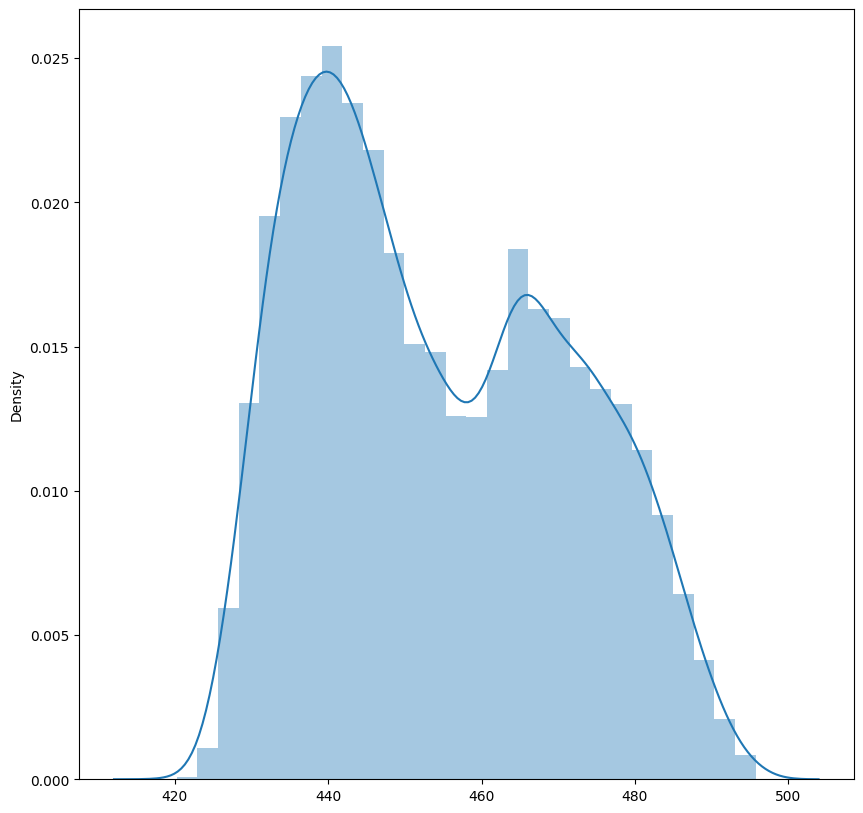

In [19]:
#Visualizing dependent data
sns.distplot(y)

The codes create a histogram and a density plot for x and y using the Seaborn library.

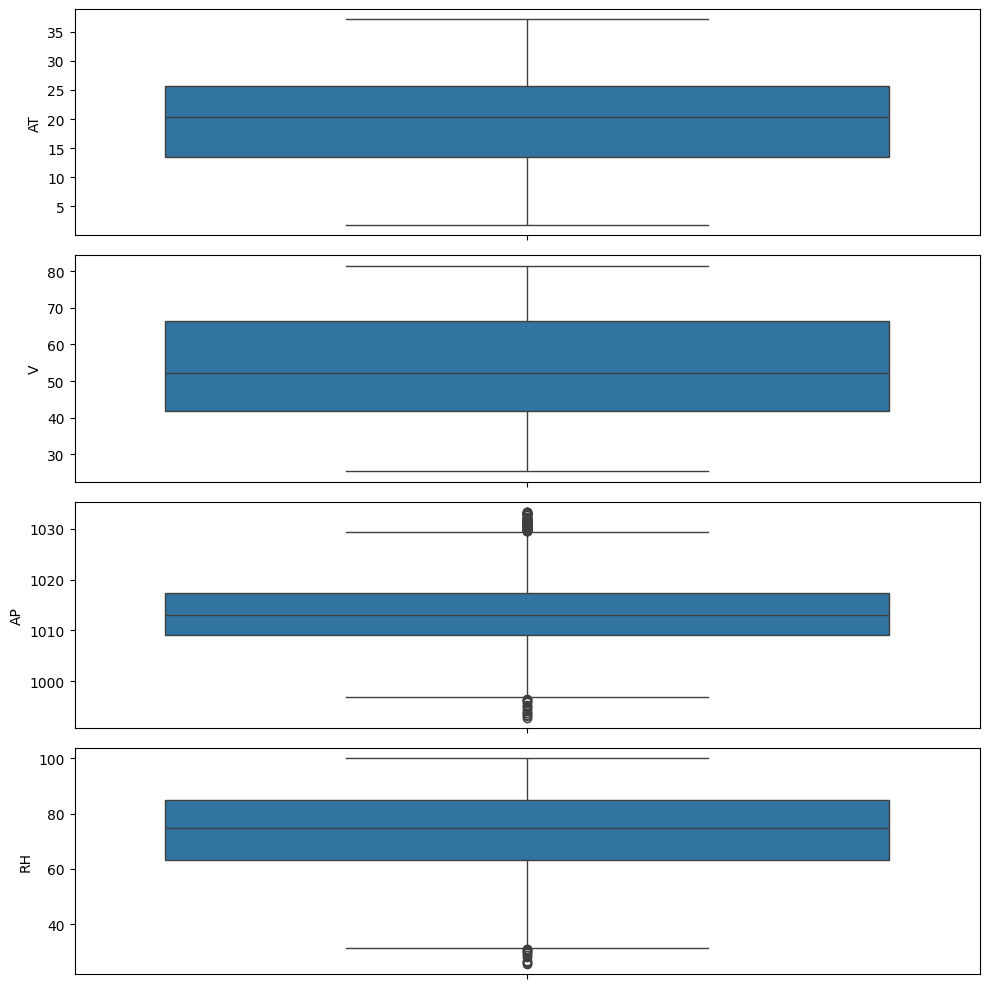

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (10,10)) # creates a figure with 4 subplots with the size of (10 inches*10 inches)
plt1 = sns.boxplot(df['AT'], ax = axs[0]) # creating a boxplot for AT
plt2 = sns.boxplot(df['V'], ax = axs[1]) # creating a boxplot for V
plt3 = sns.boxplot(df['AP'], ax = axs[2]) # creating a boxplot for AP
plt4 = sns.boxplot(df['RH'], ax = axs[3]) # creating a boxplot for RH
plt.tight_layout() # fits the subplots properly

sns.distplot functions were taken out as we now need to create 4 boxplots, one each for all 4 independent columns.
Here, 4 subplots (axs[0], axs[1], axs[2], axs[3]) are arranged with all of the figures being of size (10 inches x 10 inches).
For each subplot, boxplots are created.
Finally, the plt.tight_layout() function is used to adjust the subplots so that they fit nicely within the figure and don't overlap each other.

It can be observed that there aren't any considerable outliers in the dataset.


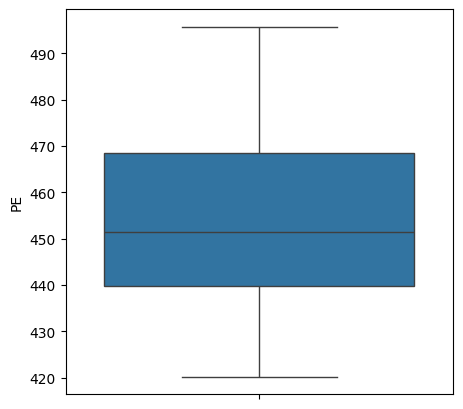

In [22]:
fig2, axs = plt.subplots(1, figsize = (5,5)) # creates a figure with 1 subplot with the size of (5 inches*5 inches)
sns.boxplot(df['PE']) # creating a boxplot for PE column
plt.show() # displaying the boxplot

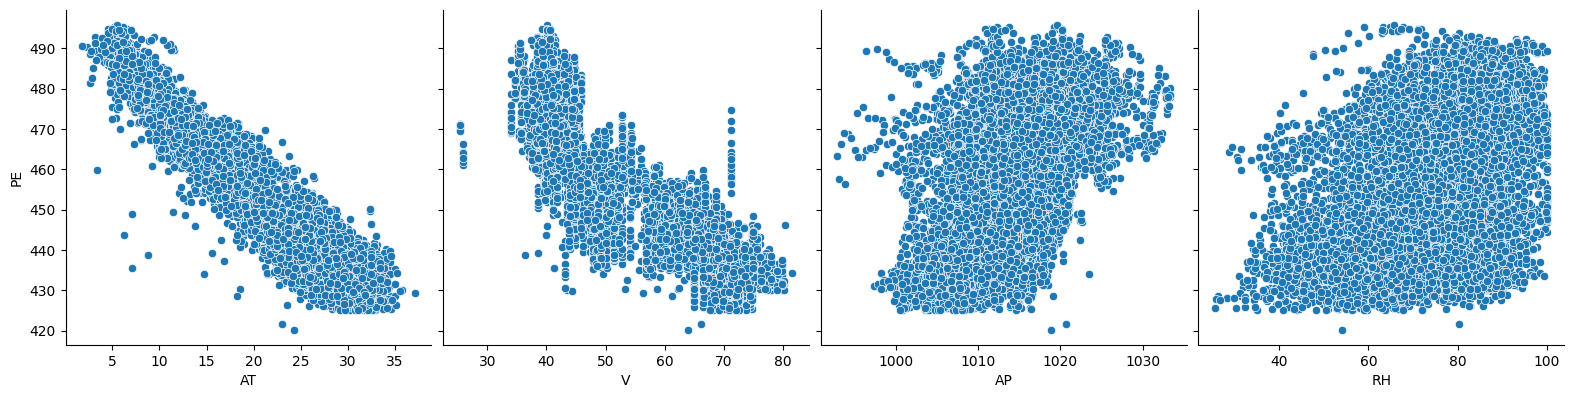

In [23]:
# pairplot to check how PE is related to other
sns.pairplot(df, x_vars=['AT', 'V', 'AP', 'RH'], y_vars='PE', height=4, aspect=1, kind='scatter')
plt.show() # displaying the pairplot

The scatter plots show the relationship between the dependent and independent variables.

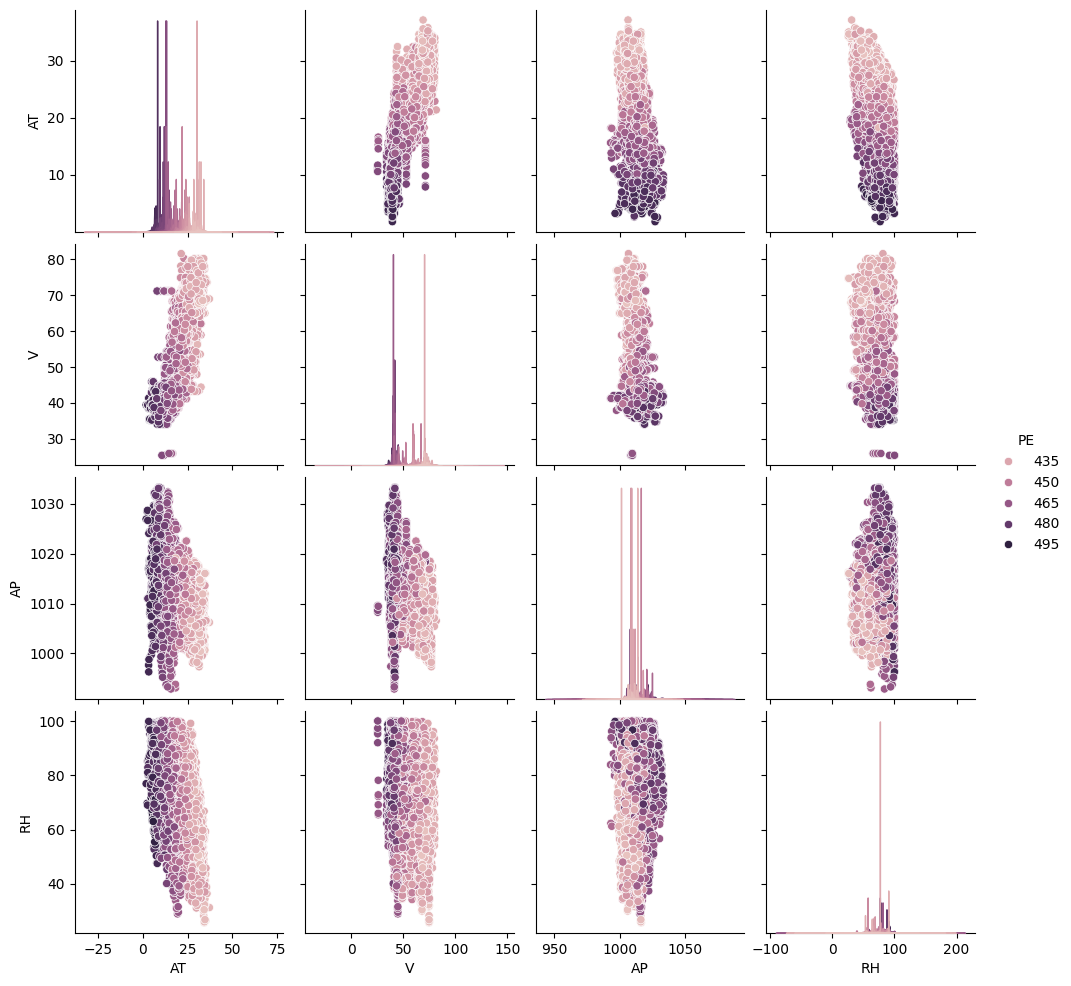

In [24]:
plt.rcParams["figure.figsize"] = (20,10) # sets the size of the plot to (20, 10)
sns.pairplot(df,hue='PE')
# hue is "PE", so the data points in the scatter plots will be color-coded based on the values of the "PE" column

The code was useful for visualizing PE's data.

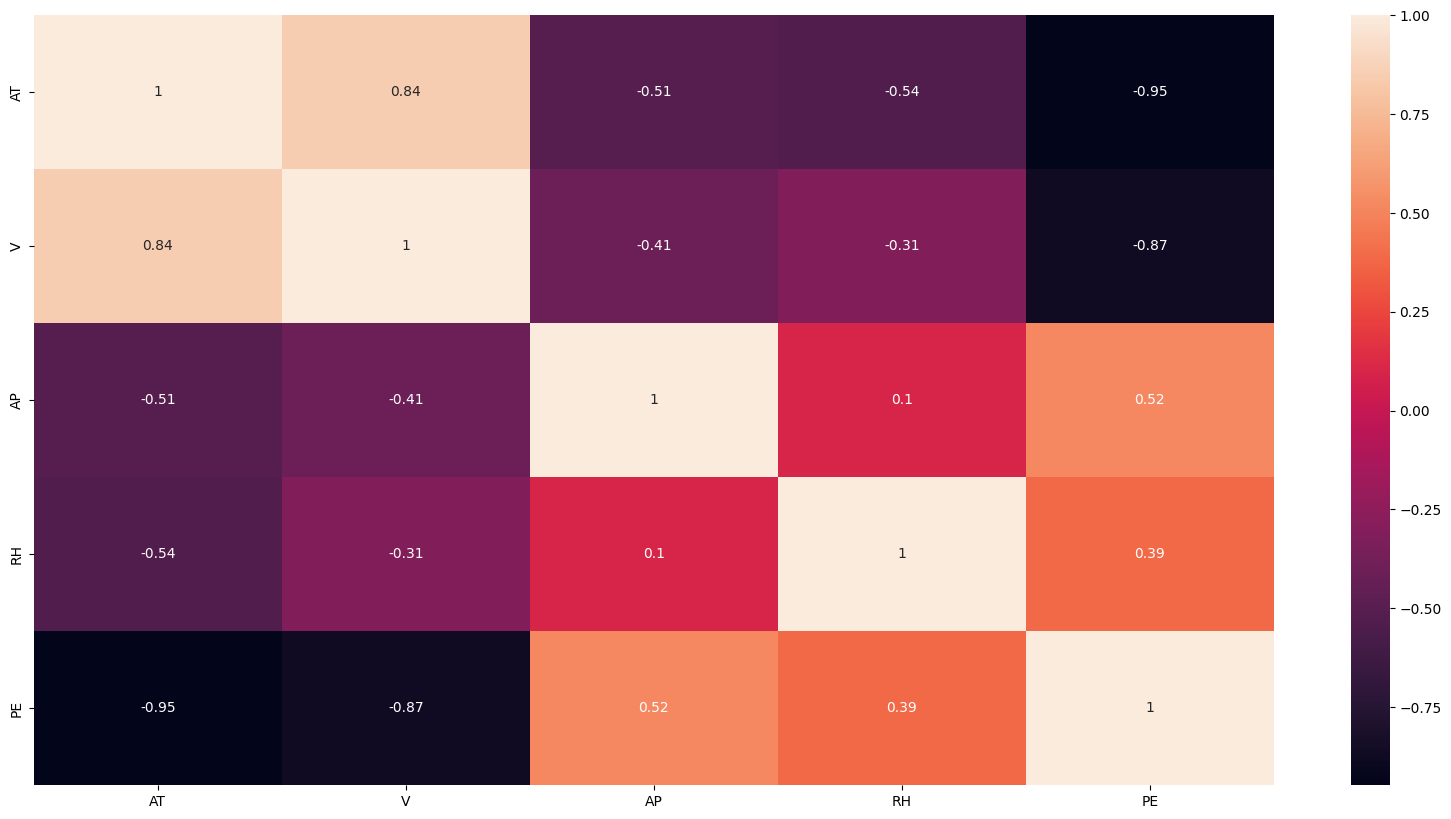

In [25]:
#  Correlation for the training set
plt.rcParams["figure.figsize"] = (20,10) # sets the size of the plot to (20, 10)
sns.heatmap(df[['AT','V','AP', 'RH', 'PE']].corr(), annot=True) # creation of the heat map for all the columns of the datasets
# annot=True adds the correlation values to the cells of the heatmap
plt.show() # display the plot

In this code, a heatmap is created to visualize the correlation between different variables in the df DataFrame. In other words, correlation for the training set is being visualized here.

In [27]:
AT = df['AT'].to_numpy() # converting AT column's values to numpy array
V = df['V'].to_numpy() # converting V column's values to numpy array
AP = df['AP'].to_numpy() # converting AP column's values to numpy array
RH = df['RH'].to_numpy() # converting RH column's values to numpy array
PE = df['PE'].to_numpy() # converting PE column's values to numpy array

In order to create the scatter plot up next, we need to find the numpy values of all the columns. Hence, all the columns's numpy values were taken out.

In [28]:
from mpl_toolkits.mplot3d import Axes3D # importing Axes3D from mpl_toolkits.mplot3d
# Ploting the values as scatter plot
fig = plt.figure()
ax = Axes3D(fig) # using Axes3D to create the figure
ax.scatter(AT, V, AP, RH, PE, color='#ef1234') # scatter plot for all 5 columns
plt.show() # displaying the plot

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/art3d.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


<Figure size 2000x1000 with 0 Axes>

**3. Build Primary Model[Multiple Linear Regression][5]:**

Once you have cleaned, transformed and Visualize your data build Multiple Linear Regression Model from
Scratch.

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [29]:
# initializing matrices which act as a container to hold our Data.
x0 = np.ones(len(AT)) # creating array of ones as the length same as that of AT
X2 = np.array([AT, V, AP, RH, PE]).T # taking the transpose of a 2D array consisting of the AT, V, AP, RH, and PE arrays
W = np.array([0, 0, 0, 0, 0]) # an array with 5 zeros
Y2 = np.array(PE) #  created as an array from the PE data


x0 array will be used as the intercept in the regression model. Similarly, The array is transposed such that each row corresponds to a sample and each column corresponds to a feature.
W provides the regression model's initial values for the coefficients.
The target variable or dependent variable in the regression model is represented by the Y2 array.


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [32]:
def cost_function(X, Y, W): # defining the function named as cost_function
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix or independent variable
      Y: Target Matrix or dependent variable
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # length of Y

    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m) # Implementing the formula of cost function
    return J # returning J for the function cost_function

In [33]:
initial_cost = cost_function(X2, Y2, W) # assigning the value returned by the function to cost1
print(initial_cost) # display the value of cost1

103369.40682388692


Here, the Mean Square Error (MSE) between the predicted values and the actual values is calculated.
For regression, we need to minimize the valuen of MSE.

## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is Gradient Descent Algorithm



Implement GDA from Scratch.

Function to estimate:
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.

In [35]:
def gradient_descent(X, Y, B, alpha, iterations): # defining the function named as gradient_descent
    cost_history = [0] * iterations # initial value as 0
    m = len(Y) # storing the length of Y in m

    """
    Parameters:
    X: Feature matrix or independent variable
    Y: Target matrix or dependent variable
    B: Weight matrix or coefficients
    alpha: learning rate
    iterations: number of iterations for which gradient descent should run
    """

    # using for loop in the range of iterations
    for iteration in range(iterations):
        # Predicted Values of Y
        Y_pred = X.dot(B)
        # Difference b/w predicted values and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        # Changing Values of W_Update using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        # storing the value of cost in iteration value of cost_history array
        cost_history[iteration] = cost

    return W_update, cost_history # returning the value for the function


In [36]:
# 1000 Iterations
alpha = 0.0001
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# Weights' New Values
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[ 0.88082507  2.4486034  46.04420116  3.34061542 20.67388136]
1567519171.8514469


This program uses gradient descent optimization to reduce a linear regression model's cost function. 100,000 iterations of the optimization are run with a learning rate of 0.0001. The updated weight values and the ultimate cost after 100,000 iterations are printed at the conclusion of the optimization. A lower cost value indicates a better fit between the model and the training set, which is represented by the cost value.

## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}


In [37]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred): # defining the function named as rmse
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y)) # using the formula of rmse
  return rmse # returning the value of rmse for the function

# Model Evaluation - R2

def r2(Y, Y_pred): # defining the function named as r2
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y) # finding the mean of Y
  ss_tot = sum((Y - mean_y) ** 2) # finding the value of sst using its formula
  ss_res = sum((Y - Y_pred) ** 2)# finding the value of sst using its formula
  r2 = 1 - (ss_res / ss_tot) # combining sst and ssr to find the value of r2
  return r2 # returning r2 for the function r2


In [38]:
Y_pred = X2.dot(new_weights)
# calculating the predicted values of the PE using the multiple linear regression equation

print(rmse(Y2, Y_pred)) # printing the returned value of rmse function
print(r2(Y2, Y_pred)) # printing the returned value of r2 function

55991.413124718434
-10764009.856166529


These are two functions for evaluating a regression model. The first function, "rmse", calculates the Root Mean Square Error, which is a measure of how much error there is between the actual values of the target variable and the predicted values. The second function, "r2", calculates the R Squared Error, which is a measure of how well the model fits the data. The R Squared value ranges from 0 to 1, with 1 being a perfect fit.

## 5. Dimensionality Reduction [6]
Apply Principal Component Analysis to reduce the dimension and rebuild the model with reduced fea tures,evaluate the model and Compare the output with the evaluation from step 4.

In [39]:
# the actual dataframe is
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## 5.1. Standardizing the dataset

In [40]:
var = df.iloc[:, 0:4] # assigning the values of first 4 columns in var
var # printing var

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [41]:
# Finding variance using Variance = (var - mean)/std
Variance = (np.asarray(df) - np.asarray(df).mean()) / np.asarray(df).std()
print("Standarized Value (Variance): \n", Variance)

Standarized Value (Variance): 
 [[-0.82854944 -0.74315016  1.81137568 -0.61348442  0.41475654]
 [-0.78825931 -0.69648735  1.81285035 -0.65511755  0.32330058]
 [-0.77219592 -0.70067436  1.80165864 -0.74014815  0.30489352]
 ...
 [-0.80840437 -0.73638248  1.8202237  -0.64337284  0.37652042]
 [-0.80403303 -0.69285334  1.83175774 -0.60126571  0.33694129]
 [-0.78815397 -0.71542107  1.81406168 -0.66291224  0.33888996]]


Initializing the mean and standard deviation of the image using .mean() and .std() function.

Variance has been found out for PCA using covariance matrix derived from variance. The formula Variance = (var-std)/std is used to manipulate the value of variance.

## 5.2. Calculating Covariance Matrix

In [42]:
# finding the covariance of the data inside the image
cov_mat = np.cov(Variance.T,bias = True)

# Prints the covariance of the image
print(cov_mat)

[[ 3.85096799e-04  5.54294280e-04 -1.55756170e-04 -4.09315147e-04
  -8.36168365e-04]
 [ 5.54294280e-04  1.11973733e-03 -2.16380389e-04 -4.01623083e-04
  -1.30800451e-03]
 [-1.55756170e-04 -2.16380389e-04  2.44547978e-04  5.98652425e-05
   3.64345105e-04]
 [-4.09315147e-04 -4.01623083e-04  5.98652425e-05  1.47805556e-03
   6.73476167e-04]
 [-8.36168365e-04 -1.30800451e-03  3.64345105e-04  6.73476167e-04
   2.01968287e-03]]


Because the covariance matrix is symmetric and its transpose little affects the features for further usage, it is used for PCA.

## 5.4. Eigen Decomposition
Decompose a covariance matrix into eigen values and eigen vectors:
A(n*n)= PDP^I

Where:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. P^I
: −Inverse of Eigen Vector.

In [43]:
#Operation for eigen values and eigen vectors of the covariance matrix
eigenValue, eigenVector = np.linalg.eig(cov_mat)
#Prints the eigen values
print("Eigenvalues", eigenValue.real)
print("Eigenvectors", eigenVector.real)


Eigenvalues [3.70560405e-03 1.15702651e-03 2.07734243e-05 2.21409207e-04
 1.42307348e-04]
Eigenvectors [[-0.3129987  -0.01059072 -0.94024795 -0.11410808 -0.06951833]
 [-0.49482252 -0.26039218  0.05027616  0.67895409  0.47311757]
 [ 0.12634499  0.1099621  -0.06802766  0.65225004 -0.73613002]
 [ 0.36553145 -0.92108703 -0.10257913 -0.0208385  -0.08383749]
 [ 0.71246487  0.26756452 -0.31345792  0.31644325  0.47160454]]


The code computes the eigenvalues and eigenvectors of a covariance matrix.The first line computes the eigenvalues and eigenvectors of the covariance matrix using the numpy linear algebra package.The second line assigns the eigenvalues' real component to eigenvalue variable.The third line sends the eigenvector's real component to eigenvector variable.The fourth line represents the eigenvalues' real component.The fifth line displays the eigenvectors' real component.

## 5.5. Identify the Principal Components

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.

– Pick three different combination of principal components with various explained variance
value and compare the result.

In [44]:
eig_pairs = [(np.abs(eigenValue[i]), eigenVector[:,i]) for i in range(len(eigenValue))]
#finding eigen pair using numpy library whlist using iteration for the length of eigen values
var_exp = [(i / sum(eigenValue))*100 for i in sorted(eigenValue, reverse=True)]
# Calculating the explained variance in sorted manner interms of percentage
cum_var_exp = np.cumsum(var_exp)
#calculates the cumulative sum of explained variable using numpy library
print (cum_var_exp)  # Displaying cum_var_exp

[ 70.62166798  92.67236236  96.89199494  99.60409859 100.        ]


 This code calculates the explained variance ratio of the eigenvalues of given data, and the cumulative explained variance ratio of those eigenvalues.

The eig_pairs list is a list of tuples, where each tuple contains an eigenvalue and its corresponding eigenvector. The list is constructed by iterating over the indices of the eigenvalues array and creating a tuple for each index. The tuple consists of the absolute value of the eigenvalue at that index and the corresponding eigenvector at that index.

The var_exp array is calculated as the ratio of each eigenvalue to the total sum of the eigenvalues, multiplied by 100 to express the ratio as a percentage. The cum_var_exp array is calculated as the cumulative sum of the var_exp array.The var_exp array represents the explained variance ratio of the individual eigenvalues, whereas the cum var exp array represents the eigenvalues' cumulative explained variance ratio. These arrays can be used to determine how much of the total variance in the data is captured by each eigenvalue and the sum of all eigenvalues. Finally, the cum_var_exp array is printed to the console using the print function.

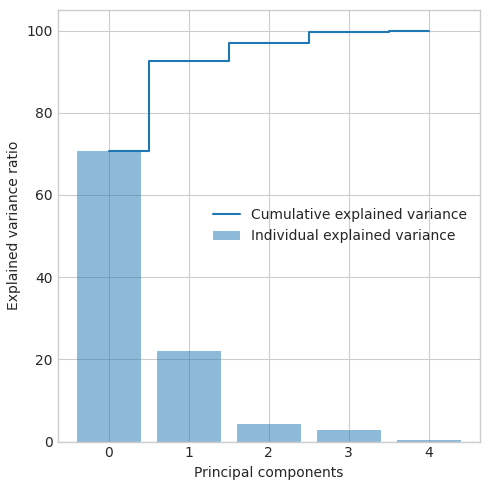

In [45]:
with plt.style.context('seaborn-whitegrid'):  # white grid using seaborn and setting it as the style using matplotlib.pyplot
    plt.figure(figsize=(5, 5))       #defines the figure of the size
    plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_var_exp)), cum_var_exp, where='mid',label='Cumulative explained variance')
    #creating barplot using .step function from matplotlib.pyplot
    plt.ylabel('Explained variance ratio')      #name of the y-axis of bargraph
    plt.xlabel('Principal components')         #name of the x-axis of bargraph
    plt.legend(loc='best')      #indexing of the bargraph
    plt.tight_layout()      #used to adjust the plot layout of the bargraph
    plt.savefig('pca2.pdf')    #saving the figure in pca2.pdf file

The code creates a bar plot to display the cumulative explained variance and the explained variance ratio of the primary components. The explained variance ratio and cumulative explained variance are both contained in the variables var exp and cum var exp, respectively. The matplotlib.pyplot library's plt.bar and plt.step methods are used to create the bar and step plots, respectively. The y-axis is labeled "Explained variance ratio," while the x-axis is labeled "Principal components." Using plt.legend(loc='best'), the legend is placed in the optimal location, and plt.tight layout is used to modify the plot layout (). The plot is then saved to a file called "pca2.pdf."

**5.6 PCA of the image: [3]**

In [46]:
indices = [] # initializing the array indices
for i in range(len(eigenValue)): # running the loop within the length of eigenValue
    value = eigenValue[i] / np.sum(eigenValue) * 100 # applying the formula for eigenValue
    print(f'The weightage of PCA{i} is: {round(value, 2)}%') #
    if value > 5: # when the value is greater than 5
        indices.append(i) # appending i in indices
PCAs = eigenVector[indices] # storing the final value in PCAs
print(PCAs) # printing the value of PCAs

The weightage of PCA0 is: 70.62%
The weightage of PCA1 is: 22.05%
The weightage of PCA2 is: 0.4%
The weightage of PCA3 is: 4.22%
The weightage of PCA4 is: 2.71%
[[-0.3129987  -0.01059072 -0.94024795 -0.11410808 -0.06951833]
 [-0.49482252 -0.26039218  0.05027616  0.67895409  0.47311757]]


## 6. Conclusion [1]
Conclude the result of the comparison.

The project's conclusion is that PCA may be used as a feature reduction approach to lessen the input data's dimensionality. In this research, I have employed linear regression to generate predictions on the target variable after applying PCA to decrease the dimensionality of the Energy output CCPP. According to the findings using PCA-reduced data, the first principle component alone may account for 70.62% of the variance, while the first two components combined can account for 92.67% of the variation. This suggests that PCA may greatly reduce the number of features while still keeping the majority of the data's information. Finally, we used the Root Mean Square Error to assess how well the linear regression model performed (RMSE) and and R Squared Error (R2).

The weights of the components indicate that PCA0 and PCA1 are negatively correlated while PCA0 and PCA1 are positively correlated. This suggests that PCA0 and PCA1 represent orthogonal directions in the feature space that capture most of the variance in the data.

However, it is important to note that the interpretation of the Principal Components is not always straightforward and may require additional analysis and visualizations to understand the underlying structure of the data.